<a href="https://colab.research.google.com/github/silvia-jesus/CAR_Labrea/blob/main/CAR_RL_Labrea_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
from osgeo import gdal

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
import glob
import shutil
import os
from pathlib import Path

In [ ]:
if not os.path.exists('/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/ANALISES'):
  os.makedirs('/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/ANALISES')

Path('./').mkdir(parents=True, exist_ok=True)

In [ ]:
if not os.path.exists('/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/ANALISES/FIGURAS'):
  os.makedirs('/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/ANALISES/FIGURAS')

Path('./').mkdir(parents=True, exist_ok=True)

In [ ]:
value = pd.read_csv('/content/drive/MyDrive/CAR_RL_Labrea/DADOS/code_mapbiomas_legend.csv',sep=';',encoding='latin1')
value['value'] = value['value'].astype(str)
value.head()

,name,code,nome,value
0,"Beach, Dune and Sand Spot",#DD7E6B,"Praia, Duna e Areal",23
1,Citrus,#d082de,Citrus,47
2,Coffee,#cca0d4,Café,46
3,Aquaculture,#02106f,Aquicultura,31
4,Forest Formation,#006400,Formação Florestal,3


In [ ]:
val_dict = dict(zip(value.value, value.name))
val_dict

{'23': 'Beach, Dune and Sand Spot',
 '47': 'Citrus',
 '46': 'Coffee',
 '31': 'Aquaculture',
 '3': 'Forest Formation',
 '9': 'Forest Plantation',
 '5': 'Mangrove',
 '12': 'Grassland',
 '30': 'Mining',
 '21': 'Mosaic of Uses',
 '48': 'Other Perennial Crop',
 '13': 'Other non Forest Formations',
 '25': 'Other non Vegetated Areas',
 '41': 'Other temporary Crops',
 '15': 'Pasture',
 '33': 'River Lake and Ocean',
 '32': 'Salt Flat',
 '29': 'Rocky Outcrop',
 '39': 'Soybean',
 '4': 'Savanna Formation',
 '20': 'Sugar Cane',
 '24': 'Urban Area',
 '11': 'Wetland',
 '49': 'Wooded Sandbank Vegetation',
 '50': 'Herbaceous Sandbank Vegetation',
 '40': 'Rice',
 '62': 'Cotton',
 '27': 'Non Observed'}

**LULC - Imóveis**

In [ ]:
lulc_im = pd.read_csv('/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/Tabelas_LULC/IM_LULC_Labrea.csv')
lulc_im.head()

,Unnamed: 0,Formação Florestal,Formação Campestre,Pastagem,COD_IMOVEL,ano,Formação Savânica,"Rio, Lago e Oceano",Campo Alagado e Área Pantanosa,Outras Lavouras Temporárias,Área Urbanizada,Mineração
0,0,479.0,6.0,492.0,AM-1302405-1A78E8FCBAEA4B2F8C005A93AE611CDC,2008,NaN,NaN,NaN,NaN,NaN,NaN
1,1,477.0,6.0,494.0,AM-1302405-1A78E8FCBAEA4B2F8C005A93AE611CDC,2012,NaN,NaN,NaN,NaN,NaN,NaN
2,2,421.0,6.0,550.0,AM-1302405-1A78E8FCBAEA4B2F8C005A93AE611CDC,2016,NaN,NaN,NaN,NaN,NaN,NaN
3,3,134.0,6.0,837.0,AM-1302405-1A78E8FCBAEA4B2F8C005A93AE611CDC,2020,NaN,NaN,NaN,NaN,NaN,NaN
4,4,888.0,NaN,NaN,AM-1302405-1AA6825354C64A2BB958720F495EBF44,2008,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
lulc_im_fill = lulc_im.fillna(0)
lulc_im_fill.head()

,Unnamed: 0,Formação Florestal,Formação Campestre,Pastagem,COD_IMOVEL,ano,Formação Savânica,"Rio, Lago e Oceano",Campo Alagado e Área Pantanosa,Outras Lavouras Temporárias,Área Urbanizada,Mineração
0,0,479.0,6.0,492.0,AM-1302405-1A78E8FCBAEA4B2F8C005A93AE611CDC,2008,0.0,0.0,0.0,0.0,0.0,0.0
1,1,477.0,6.0,494.0,AM-1302405-1A78E8FCBAEA4B2F8C005A93AE611CDC,2012,0.0,0.0,0.0,0.0,0.0,0.0
2,2,421.0,6.0,550.0,AM-1302405-1A78E8FCBAEA4B2F8C005A93AE611CDC,2016,0.0,0.0,0.0,0.0,0.0,0.0
3,3,134.0,6.0,837.0,AM-1302405-1A78E8FCBAEA4B2F8C005A93AE611CDC,2020,0.0,0.0,0.0,0.0,0.0,0.0
4,4,888.0,0.0,0.0,AM-1302405-1AA6825354C64A2BB958720F495EBF44,2008,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
lulc_im_fill.columns

Index(['Unnamed: 0', 'Formação Florestal', 'Formação Campestre', 'Pastagem',
       'COD_IMOVEL', 'ano', 'Formação Savânica', 'Rio, Lago e Oceano',
       'Campo Alagado e Área Pantanosa', 'Outras Lavouras Temporárias',
       'Área Urbanizada', 'Mineração'],
      dtype='object')

In [ ]:
lulc_im_order = lulc_im_fill[['COD_IMOVEL', 'ano','Formação Florestal', 'Pastagem',
       'Formação Campestre', 'Outras Lavouras Temporárias',
       'Campo Alagado e Área Pantanosa', 'Rio, Lago e Oceano',
       'Formação Savânica', 'Mineração', 'Área Urbanizada']]
lulc_im_order.head()

,COD_IMOVEL,ano,Formação Florestal,Pastagem,Formação Campestre,Outras Lavouras Temporárias,Campo Alagado e Área Pantanosa,"Rio, Lago e Oceano",Formação Savânica,Mineração,Área Urbanizada
0,AM-1302405-1A78E8FCBAEA4B2F8C005A93AE611CDC,2008,479.0,492.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AM-1302405-1A78E8FCBAEA4B2F8C005A93AE611CDC,2012,477.0,494.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AM-1302405-1A78E8FCBAEA4B2F8C005A93AE611CDC,2016,421.0,550.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AM-1302405-1A78E8FCBAEA4B2F8C005A93AE611CDC,2020,134.0,837.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AM-1302405-1AA6825354C64A2BB958720F495EBF44,2008,888.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
lulc_names = ['Formação Florestal', 'Pastagem',
       'Formação Campestre', 'Outras Lavouras Temporárias',
       'Campo Alagado e Área Pantanosa', 'Rio, Lago e Oceano',
       'Formação Savânica', 'Mineração', 'Área Urbanizada']

In [ ]:
a = 900/10000 #hectares
# a = 900/1000000 #km2

for name in lulc_names:
  lulc_im_order[name] = lulc_im_order[name].apply(lambda x: x*a)

lulc_im_order.head() #tabela com a área calculada a partir do número de pixels por classes de cobertura da terra

<ipython-input-66-672e50dd68b5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lulc_im_order[name] = lulc_im_order[name].apply(lambda x: x*a)


,COD_IMOVEL,ano,Formação Florestal,Pastagem,Formação Campestre,Outras Lavouras Temporárias,Campo Alagado e Área Pantanosa,"Rio, Lago e Oceano",Formação Savânica,Mineração,Área Urbanizada
0,AM-1302405-1A78E8FCBAEA4B2F8C005A93AE611CDC,2008,43.11,44.28,0.54,0.0,0.0,0.0,0.0,0.0,0.0
1,AM-1302405-1A78E8FCBAEA4B2F8C005A93AE611CDC,2012,42.93,44.46,0.54,0.0,0.0,0.0,0.0,0.0,0.0
2,AM-1302405-1A78E8FCBAEA4B2F8C005A93AE611CDC,2016,37.89,49.50,0.54,0.0,0.0,0.0,0.0,0.0,0.0
3,AM-1302405-1A78E8FCBAEA4B2F8C005A93AE611CDC,2020,12.06,75.33,0.54,0.0,0.0,0.0,0.0,0.0,0.0
4,AM-1302405-1AA6825354C64A2BB958720F495EBF44,2008,79.92,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#processamento para identificar os imóveis que têm o mesmo perímetro das UCs de acordo com a área e código do imóvel
lulc_im_cp = lulc_im_order.copy()
lulc_im_cp['Total'] = lulc_im_cp.iloc[:, 2:].sum(axis=1)
lulc_im_cp = lulc_im_cp[lulc_im_cp['ano'] == 2008]
lulc_im_sorted = lulc_im_cp.sort_values(by=['Total'],ascending=False)
print(lulc_im_sorted.shape)
lulc_im_sorted.head()

(3526, 12)


,COD_IMOVEL,ano,Formação Florestal,Pastagem,Formação Campestre,Outras Lavouras Temporárias,Campo Alagado e Área Pantanosa,"Rio, Lago e Oceano",Formação Savânica,Mineração,Área Urbanizada,Total
12012,AM-1302405-8C68014707E543FA8B54A7C8488CEB56,2008,1486341.90,9956.07,1353.87,0.0,606.78,3868.92,174.78,0.0,0.0,1502302.32
12308,AM-1302405-A6F760C244FF4EC096AD9D8859B6FEBF,2008,957118.59,2508.75,4050.36,0.0,92.34,2732.67,449.91,0.0,0.0,966952.62
13252,AM-1302405-D9FE0152C74047A682B2CFFE1AC08FD5,2008,780719.49,2003.49,2675.97,9.9,1156.32,5225.40,194.13,0.0,0.0,791984.70
12384,AM-1302405-B0B1C7DBC5264B89BD8B0D8F0A64569F,2008,586361.16,2961.90,7276.68,0.0,1830.96,17834.76,152.64,0.0,0.0,616418.10
12112,AM-1302405-96D37CEB2E0641B79D3DCDC1E8995117,2008,149886.36,183.60,44.64,0.0,124.92,1232.37,0.00,0.0,0.0,151471.89


In [ ]:
cod_imovel = ['AM-1302405-8C68014707E543FA8B54A7C8488CEB56','AM-1302405-D9FE0152C74047A682B2CFFE1AC08FD5','AM-1302405-B0B1C7DBC5264B89BD8B0D8F0A64569F']

In [ ]:
lulc_im_order.shape

(14104, 11)

In [ ]:
lulc_im_order_filtered = lulc_im_order[lulc_im_order['COD_IMOVEL'].isin(cod_imovel) == False]

print(lulc_im_order_filtered.shape)

(14092, 11)


In [ ]:
lulc_im_year_mean = lulc_im_order_filtered.groupby('ano')[lulc_names].mean().reset_index().sort_values(by=['ano'], axis=0, ascending=False, inplace=False)
lulc_im_year_mean.columns

Index(['ano', 'Formação Florestal', 'Pastagem', 'Formação Campestre',
       'Outras Lavouras Temporárias', 'Campo Alagado e Área Pantanosa',
       'Rio, Lago e Oceano', 'Formação Savânica', 'Mineração',
       'Área Urbanizada'],
      dtype='object')

In [ ]:
lulc_names_EN = ['Forest Formation','Pasture','Grassland','Other temporary Crops','Wetland','River Lake and Ocean','Savanna Formation','Mining','Urban Area']

In [ ]:
lulc_im_year_mean.columns = ['Year','Forest Formation','Pasture','Grassland','Other temporary Crops','Wetland','River Lake and Ocean','Savanna Formation','Mining','Urban Area']
lulc_im_year_mean

,Year,Forest Formation,Pasture,Grassland,Other temporary Crops,Wetland,River Lake and Ocean,Savanna Formation,Mining,Urban Area
3,2020,937.709464,140.081896,8.051538,0.460985,0.317695,3.228708,0.450204,0.048359,0.000409
2,2016,968.806699,109.172733,7.947054,0.363960,0.372416,3.138632,0.500071,0.047389,0.000409
1,2012,987.720392,90.804405,7.910446,0.028050,0.242921,3.137942,0.457996,0.047005,0.000409
0,2008,996.877400,81.726284,7.842671,0.014306,0.259603,3.140446,0.446347,0.042254,0.000409


In [ ]:
lulc_im_year_sum = lulc_im_order_filtered.groupby('ano')[lulc_names].sum().reset_index().sort_values(by=['ano'], axis=0, ascending=False, inplace=False)
lulc_im_year_sum.columns = ['Year','Forest Formation','Pasture','Grassland','Other temporary Crops','Wetland','River Lake and Ocean','Savanna Formation','Mining','Urban Area']
lulc_im_year_sum

,Year,Forest Formation,Pasture,Grassland,Other temporary Crops,Wetland,River Lake and Ocean,Savanna Formation,Mining,Urban Area
3,2020,3303550.44,493508.52,28365.57,1624.05,1119.24,11374.74,1586.07,170.37,1.44
2,2016,3413106.00,384615.54,27997.47,1282.23,1312.02,11057.40,1761.75,166.95,1.44
1,2012,3479738.94,319903.92,27868.50,98.82,855.81,11054.97,1613.52,165.60,1.44
0,2008,3511999.08,287921.70,27629.73,50.40,914.58,11063.79,1572.48,148.86,1.44


In [ ]:
code = []
for i in lulc_names_EN:
    c = value.loc[value['name'] == i, 'code'].tolist()
    code.append(c)

code_colors = [item for sublist in code for item in sublist] #flatten list
code_colors

['#006400',
 '#FFD966',
 '#B8AF4F',
 '#e787f8',
 '#45C2A5',
 '#0000FF',
 '#00ff00',
 '#8a2be2',
 '#aa0000']

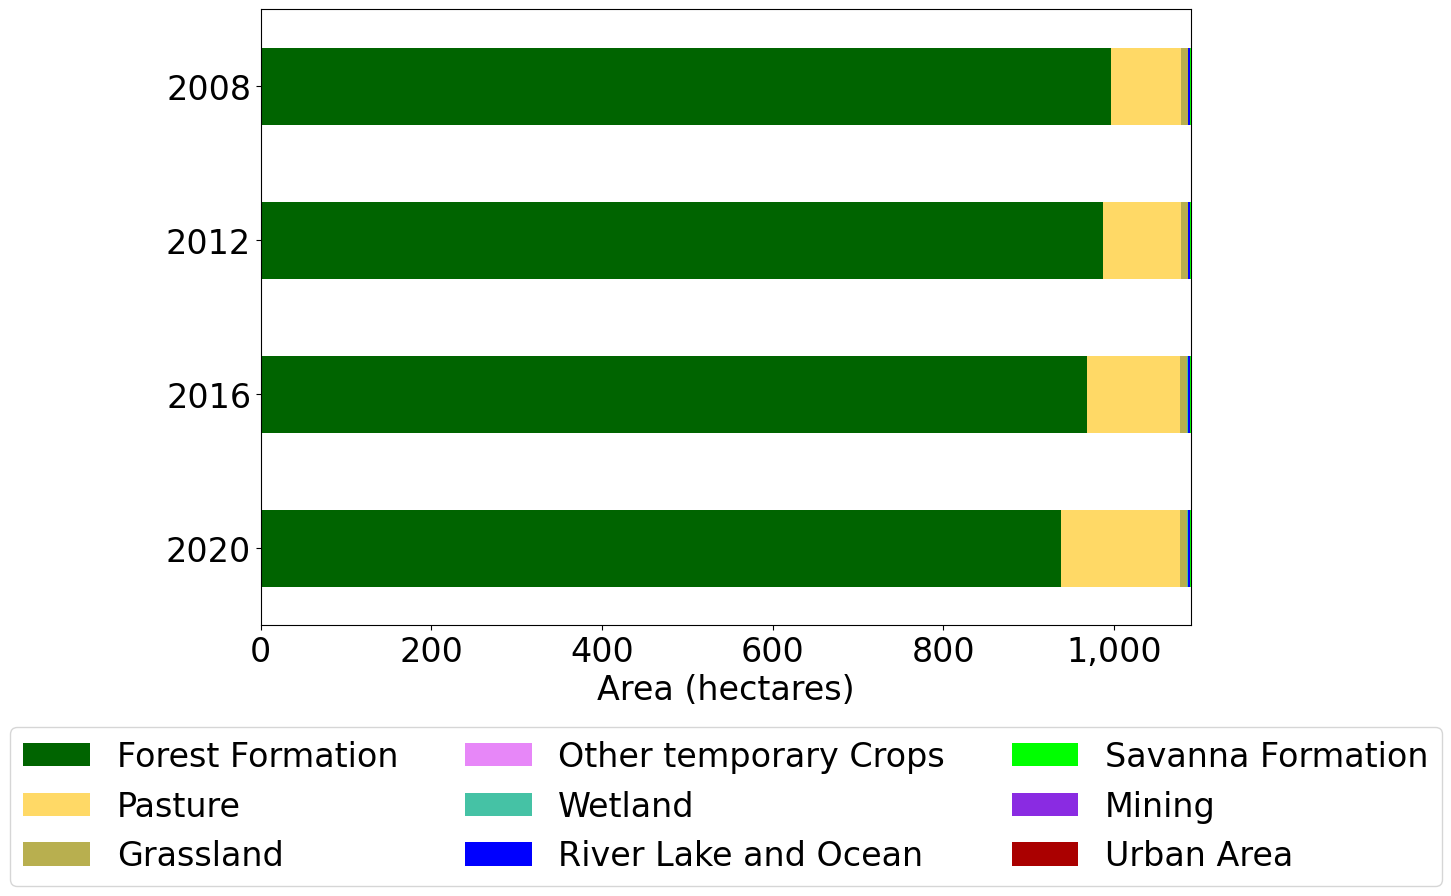

In [ ]:
fig=lulc_im_year_mean.plot(x = 'Year',    kind = 'barh',    stacked = True,
                           mark_right = True,    figsize=(12, 8),    color = code_colors, legend = False )
fig.ticklabel_format(style='plain', useOffset=False, axis='x')
fig.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}')) #split thousands with "."
# fig.set_xlabel('Área (km\u00b2)')
fig.set_xlabel('Area (hectares)')
fig.set_ylabel('')
fig.legend(labels=lulc_names_EN, loc='lower center', bbox_to_anchor=(0.5, -0.45),ncol=3)
plt.rcParams.update({'font.size': 24})
fig.figure.savefig('/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/ANALISES/FIGURAS/LULC_IM_absoluto_media.png', dpi =500,bbox_inches = 'tight')

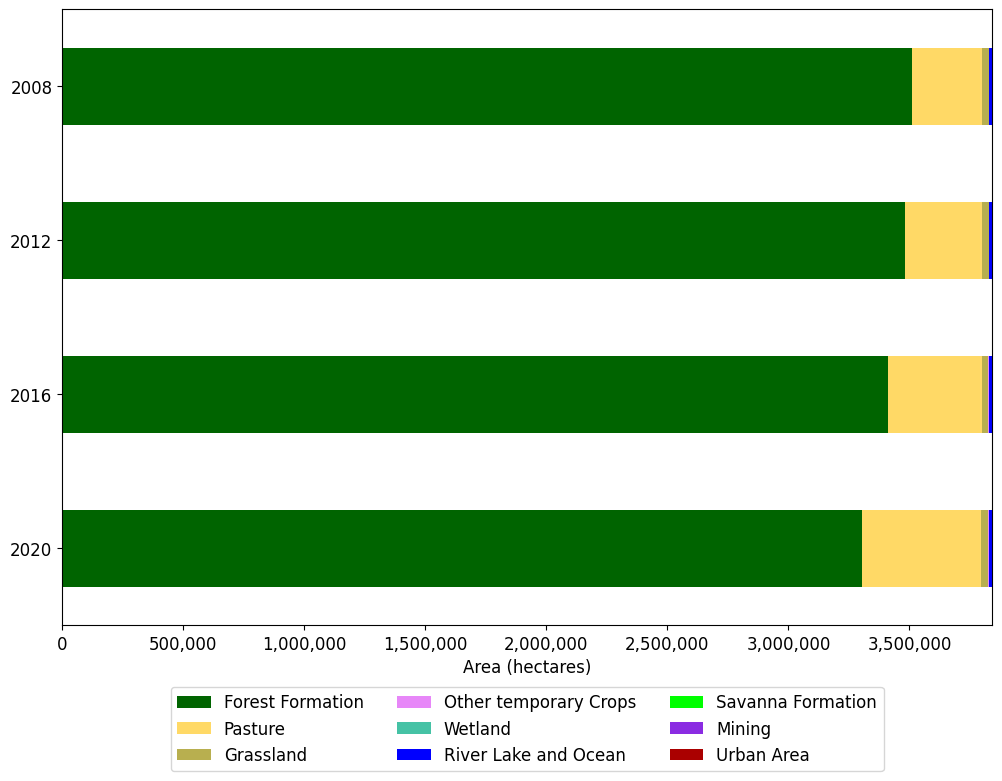

In [ ]:
fig=lulc_im_year_sum.plot(x = 'Year',    kind = 'barh',    stacked = True,
                          # title = 'Área total das classes de cobertura da terra nos Imóveis',
                          mark_right = True,    figsize=(12, 8),    color = code_colors, legend = False )
fig.ticklabel_format(style='plain', useOffset=False, axis='x')
fig.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}')) #split thousands with "."
# fig.set_xlabel('Área (km\u00b2)')
fig.set_xlabel('Area (hectares)')
fig.set_ylabel('')
fig.legend(labels=lulc_names_EN, loc='lower center', bbox_to_anchor=(0.5, -0.25),ncol=3)

fig.figure.savefig('/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/ANALISES/FIGURAS/LULC_IM_absoluto_soma.png', dpi =500,bbox_inches = 'tight')

Gráficos em percentuais

In [ ]:
lulc_im_reset = lulc_im_year_sum.set_index('Year')#reseta para somar as demais colunas
lulc_im_prop = lulc_im_reset.div(lulc_im_reset.sum(1), axis=0)*100
lulc_im_prop.reset_index(inplace=True)#devolve a coluna de ano para fazer o gráfico
lulc_im_prop

,Year,Forest Formation,Pasture,Grassland,Other temporary Crops,Wetland,River Lake and Ocean,Savanna Formation,Mining,Urban Area
0,2020,86.000835,12.847434,0.738437,0.042279,0.029137,0.296117,0.041290,0.004435,0.000037
1,2016,88.852870,10.012638,0.728854,0.033380,0.034156,0.287856,0.045863,0.004346,0.000037
2,2012,90.587498,8.328009,0.725496,0.002573,0.022279,0.287792,0.042005,0.004311,0.000037
3,2008,91.427308,7.495419,0.719280,0.001312,0.023809,0.288022,0.040936,0.003875,0.000037


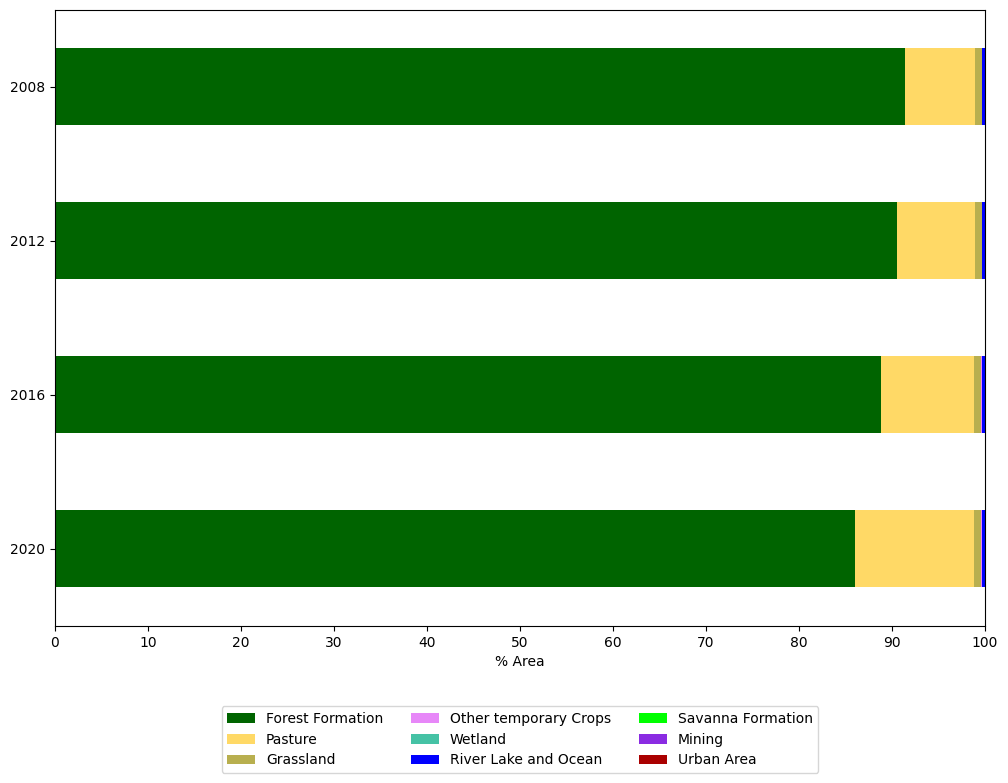

In [ ]:
fig=lulc_im_prop.plot(x = 'Year',    kind = 'barh',    stacked = True,
                      # title = 'Percentual das classes de cobertura da terra nos Imóveis',
                      mark_right = True,    figsize=(12, 8),    color = code_colors, legend = False )
fig.ticklabel_format(style='plain', useOffset=False, axis='x')
fig.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}')) #split thousands with "."
# fig.set_xlabel('Área (km\u00b2)')
fig.set_xlabel('% Area')
fig.set_ylabel('')
fig.legend(labels=lulc_names_EN, loc='lower center', bbox_to_anchor=(0.5, -0.25),ncol=3)
fig.set(xticks=range(0, 110, 10))

fig.figure.savefig('/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/ANALISES/FIGURAS/LULC_IM_percentual_soma.png', dpi =500,bbox_inches = 'tight')

**Análise das classes recodificadas**

In [ ]:
recode_im = pd.read_csv('/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/Tabelas_LULC/IM_RECODE_Labrea.csv')
recode_im.head()

,Unnamed: 0,1,2,3,COD_IMOVEL,ano,5,4
0,0,479.0,6.0,492.0,AM-1302405-1A78E8FCBAEA4B2F8C005A93AE611CDC,2008,NaN,NaN
1,1,421.0,6.0,550.0,AM-1302405-1A78E8FCBAEA4B2F8C005A93AE611CDC,2016,NaN,NaN
2,2,477.0,6.0,494.0,AM-1302405-1A78E8FCBAEA4B2F8C005A93AE611CDC,2012,NaN,NaN
3,3,134.0,6.0,837.0,AM-1302405-1A78E8FCBAEA4B2F8C005A93AE611CDC,2020,NaN,NaN
4,4,888.0,NaN,NaN,AM-1302405-1AA6825354C64A2BB958720F495EBF44,2008,NaN,NaN


In [ ]:
recode_im_fill = recode_im.fillna(0)
recode_im_fill.head()

,Unnamed: 0,1,2,3,COD_IMOVEL,ano,5,4
0,0,479.0,6.0,492.0,AM-1302405-1A78E8FCBAEA4B2F8C005A93AE611CDC,2008,0.0,0.0
1,1,421.0,6.0,550.0,AM-1302405-1A78E8FCBAEA4B2F8C005A93AE611CDC,2016,0.0,0.0
2,2,477.0,6.0,494.0,AM-1302405-1A78E8FCBAEA4B2F8C005A93AE611CDC,2012,0.0,0.0
3,3,134.0,6.0,837.0,AM-1302405-1A78E8FCBAEA4B2F8C005A93AE611CDC,2020,0.0,0.0
4,4,888.0,0.0,0.0,AM-1302405-1AA6825354C64A2BB958720F495EBF44,2008,0.0,0.0


In [ ]:
recode_im_order = recode_im_fill[['COD_IMOVEL','ano','1','2','3','4','5']]
recode_im_order.head()

,COD_IMOVEL,ano,1,2,3,4,5
0,AM-1302405-1A78E8FCBAEA4B2F8C005A93AE611CDC,2008,479.0,6.0,492.0,0.0,0.0
1,AM-1302405-1A78E8FCBAEA4B2F8C005A93AE611CDC,2016,421.0,6.0,550.0,0.0,0.0
2,AM-1302405-1A78E8FCBAEA4B2F8C005A93AE611CDC,2012,477.0,6.0,494.0,0.0,0.0
3,AM-1302405-1A78E8FCBAEA4B2F8C005A93AE611CDC,2020,134.0,6.0,837.0,0.0,0.0
4,AM-1302405-1AA6825354C64A2BB958720F495EBF44,2008,888.0,0.0,0.0,0.0,0.0


In [ ]:
recode_im_values=['1','2','3','4','5']

In [ ]:
a = 900/10000 #hectares
# a = 900/1000000 #km2

for val in recode_im_values:
  recode_im_order[val] = recode_im_order[val].apply(lambda x: x*a)

recode_im_order.head() #tabela com a área calculada a partir do número de pixels por classes de cobertura da terra

<ipython-input-127-a2c92d56b76e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recode_im_order[val] = recode_im_order[val].apply(lambda x: x*a)


,COD_IMOVEL,ano,1,2,3,4,5
0,AM-1302405-1A78E8FCBAEA4B2F8C005A93AE611CDC,2008,43.11,0.54,44.28,0.0,0.0
1,AM-1302405-1A78E8FCBAEA4B2F8C005A93AE611CDC,2016,37.89,0.54,49.50,0.0,0.0
2,AM-1302405-1A78E8FCBAEA4B2F8C005A93AE611CDC,2012,42.93,0.54,44.46,0.0,0.0
3,AM-1302405-1A78E8FCBAEA4B2F8C005A93AE611CDC,2020,12.06,0.54,75.33,0.0,0.0
4,AM-1302405-1AA6825354C64A2BB958720F495EBF44,2008,79.92,0.00,0.00,0.0,0.0


In [ ]:
n_by_ano = recode_im_order.groupby('ano')['COD_IMOVEL'].count()
n_by_ano

ano
2008    3526
2012    3526
2016    3526
2020    3526
Name: COD_IMOVEL, dtype: int64

In [ ]:
recode_im_order['vegnat']=recode_im_order['1']+recode_im_order['2']
recode_im_order.head()

,COD_IMOVEL,ano,1,2,3,4,5,vegnat
0,AM-1302405-1A78E8FCBAEA4B2F8C005A93AE611CDC,2008,43.11,0.54,44.28,0.0,0.0,43.65
1,AM-1302405-1A78E8FCBAEA4B2F8C005A93AE611CDC,2016,37.89,0.54,49.50,0.0,0.0,38.43
2,AM-1302405-1A78E8FCBAEA4B2F8C005A93AE611CDC,2012,42.93,0.54,44.46,0.0,0.0,43.47
3,AM-1302405-1A78E8FCBAEA4B2F8C005A93AE611CDC,2020,12.06,0.54,75.33,0.0,0.0,12.60
4,AM-1302405-1AA6825354C64A2BB958720F495EBF44,2008,79.92,0.00,0.00,0.0,0.0,79.92


In [ ]:
recode_im_order['sum'] =  recode_im_order[['1', '2','3','4', '5']].sum(axis=1)
recode_im_order['perc_1']=recode_im_order['1']/recode_im_order['sum']
recode_im_order['perc_2']=recode_im_order['2']/recode_im_order['sum']
recode_im_order['perc_3']=recode_im_order['3']/recode_im_order['sum']
recode_im_order['perc_4']=recode_im_order['4']/recode_im_order['sum']
recode_im_order['perc_5']=recode_im_order['5']/recode_im_order['sum']
recode_im_order['perc_vegnat']=recode_im_order['vegnat']/recode_im_order['sum']
recode_im_order.head()

,COD_IMOVEL,ano,1,2,3,4,5,vegnat,sum,perc_1,perc_2,perc_3,perc_4,perc_5,perc_vegnat
0,AM-1302405-1A78E8FCBAEA4B2F8C005A93AE611CDC,2008,43.11,0.54,44.28,0.0,0.0,43.65,87.93,0.490276,0.006141,0.503582,0.0,0.0,0.496418
1,AM-1302405-1A78E8FCBAEA4B2F8C005A93AE611CDC,2016,37.89,0.54,49.50,0.0,0.0,38.43,87.93,0.430911,0.006141,0.562948,0.0,0.0,0.437052
2,AM-1302405-1A78E8FCBAEA4B2F8C005A93AE611CDC,2012,42.93,0.54,44.46,0.0,0.0,43.47,87.93,0.488229,0.006141,0.505629,0.0,0.0,0.494371
3,AM-1302405-1A78E8FCBAEA4B2F8C005A93AE611CDC,2020,12.06,0.54,75.33,0.0,0.0,12.60,87.93,0.137155,0.006141,0.856704,0.0,0.0,0.143296
4,AM-1302405-1AA6825354C64A2BB958720F495EBF44,2008,79.92,0.00,0.00,0.0,0.0,79.92,79.92,1.000000,0.000000,0.000000,0.0,0.0,1.000000


In [ ]:
sum_by_ano = recode_im_order.groupby('ano')['sum'].sum()
sum_by_ano

ano
2008    6752007.18
2012    6752006.46
2016    6752006.01
2020    6752005.74
Name: sum, dtype: float64

In [ ]:
recode_im_order_filtered = recode_im_order[recode_im_order['COD_IMOVEL'].isin(cod_imovel) == False]

print(lulc_im_order_filtered.shape)

(14092, 11)


In [ ]:
year = recode_im_order_filtered['ano'].unique()
year

array([2008, 2016, 2012, 2020])

In [ ]:
count = recode_im_order_filtered['COD_IMOVEL'].nunique()

for y in year:
  irregular_im = recode_im_order_filtered[(recode_im_order_filtered['vegnat']<80) & (recode_im_order_filtered['ano']==y)]
  irr = irregular_im.shape[0]
  perc_irr = irr/count*100
  print(f'Em {y}, havia {irr} imóveis com menos de 80% de cobertura de vegetação nativa,({perc_irr:.2f}%).')



print (f'Foram analisados {count} imóveis.')

Em 2008, havia 1560 imóveis com menos de 80% de cobertura de vegetação nativa,(44.28%).
Em 2016, havia 2125 imóveis com menos de 80% de cobertura de vegetação nativa,(60.32%).
Em 2012, havia 1792 imóveis com menos de 80% de cobertura de vegetação nativa,(50.87%).
Em 2020, havia 2319 imóveis com menos de 80% de cobertura de vegetação nativa,(65.82%).
Foram analisados 3523 imóveis.


In [ ]:
count = recode_im_order_filtered['COD_IMOVEL'].nunique()

for y in year:
  irregular_im = recode_im_order_filtered[(recode_im_order_filtered['vegnat']<50) & (recode_im_order_filtered['ano']==y)]
  irr = irregular_im.shape[0]
  perc_irr = irr/count*100
  print(f'Em {y}, havia {irr} imóveis com menos de 50% de cobertura de vegetação nativa,({perc_irr:.2f}%).')



print (f'Foram analisados {count} imóveis.')

Em 2008, havia 991 imóveis com menos de 50% de cobertura de vegetação nativa,(28.13%).
Em 2016, havia 1515 imóveis com menos de 50% de cobertura de vegetação nativa,(43.00%).
Em 2012, havia 1169 imóveis com menos de 50% de cobertura de vegetação nativa,(33.18%).
Em 2020, havia 1847 imóveis com menos de 50% de cobertura de vegetação nativa,(52.43%).
Foram analisados 3523 imóveis.


In [ ]:
recode_im_year_mean = recode_im_order_filtered.groupby('ano')['1','2','3','4','5','vegnat'].mean().reset_index().sort_values(by=['ano'], axis=0, ascending=False, inplace=False)
recode_im_year_mean

<ipython-input-136-1690108080e5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  recode_im_year_mean = recode_im_order_filtered.groupby('ano')['1','2','3','4','5','vegnat'].mean().reset_index().sort_values(by=['ano'], axis=0, ascending=False, inplace=False)


,ano,1,2,3,4,5,vegnat
3,2020,938.159668,8.369234,140.542881,0.048768,3.228708,946.528902
2,2016,969.306770,8.319469,109.536693,0.047797,3.138632,977.626239
1,2012,988.178388,8.153366,90.832455,0.047414,3.137942,996.331754
0,2008,997.323747,8.102274,81.740590,0.042663,3.140446,1005.426020


In [ ]:
recode_im_year_sum = recode_im_order_filtered.groupby('ano')['1','2','3','4','5','vegnat'].sum().reset_index().sort_values(by=['ano'], axis=0, ascending=False, inplace=False)
recode_im_year_sum

<ipython-input-137-6fe2d07d564a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  recode_im_year_sum = recode_im_order_filtered.groupby('ano')['1','2','3','4','5','vegnat'].sum().reset_index().sort_values(by=['ano'], axis=0, ascending=False, inplace=False)


,ano,1,2,3,4,5,vegnat
3,2020,3305136.51,29484.81,495132.57,171.81,11374.74,3334621.32
2,2016,3414867.75,29309.49,385897.77,168.39,11057.40,3444177.24
1,2012,3481352.46,28724.31,320002.74,167.04,11054.97,3510076.77
0,2008,3513571.56,28544.31,287972.10,150.30,11063.79,3542115.87


In [ ]:
code_colors_2 = ['#129912','#bbfcac','#ffffb2','#ea9999','#0000ff']
# superclasses = ['Floresta','Formação Natural não Florestal','Agropecuária','Área não Vegetada',"Corpo D'água"] #usar aspas duplas para inserir as aspas simples na string
superclasses = ['Forest','Non Forest Natural Formation','Farming','Non vegetated area','Water']

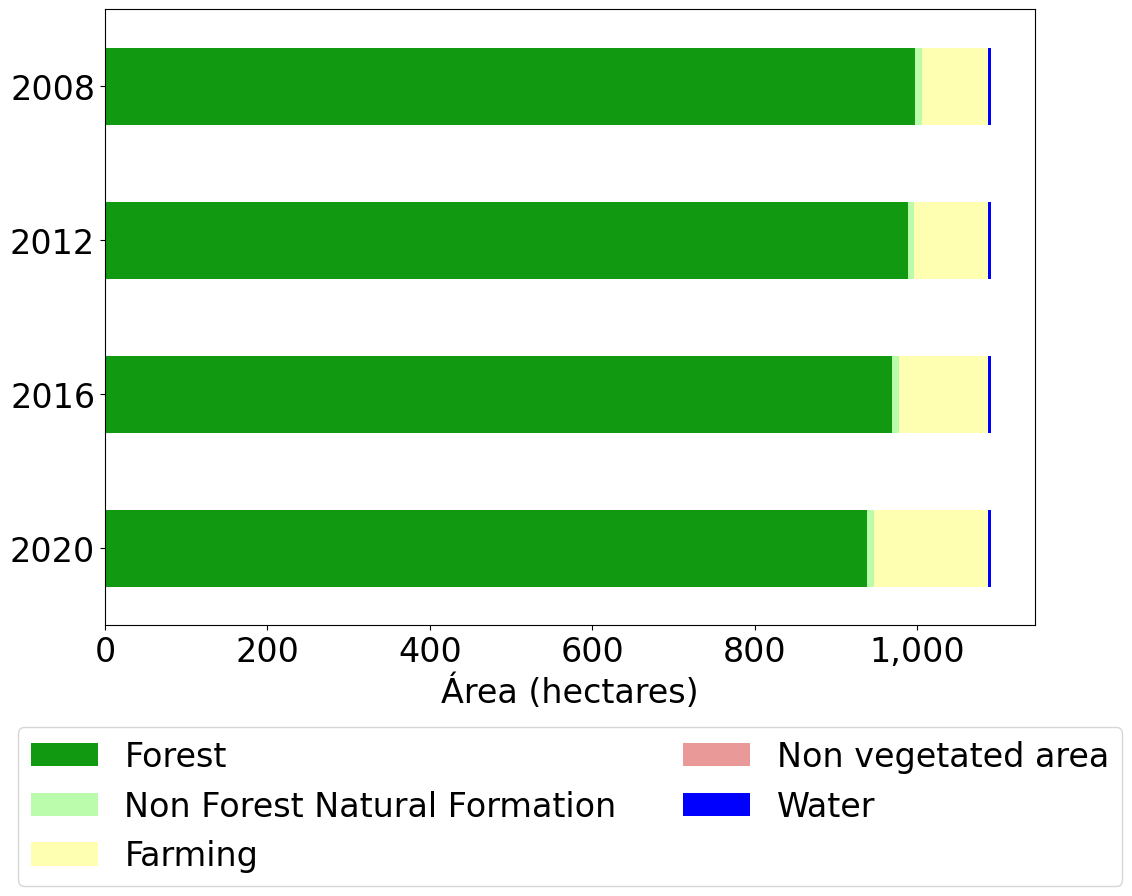

In [ ]:
recode_mean = recode_im_year_mean.drop(['vegnat'], axis=1)
fig=recode_mean.plot(x = 'ano',    kind = 'barh',    stacked = True,
                    #  title = 'Área média das classes de cobertura da terra nos Imóveis',
                     mark_right = True,    figsize=(12, 8),    color = code_colors_2, legend = False )
fig.ticklabel_format(style='plain', useOffset=False, axis='x')
fig.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}')) #split thousands with "."
# fig.set_xlabel('Área (km\u00b2)')
fig.set_xlabel('Área (hectares)')
fig.set_ylabel('')
fig.legend(labels=superclasses, loc='lower center', bbox_to_anchor=(0.5, -0.45),ncol=2)
plt.rcParams.update({'font.size': 24})

fig.figure.savefig('/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/ANALISES/FIGURAS/Recode_IM_absoluto_media.png', dpi =500,bbox_inches = 'tight')

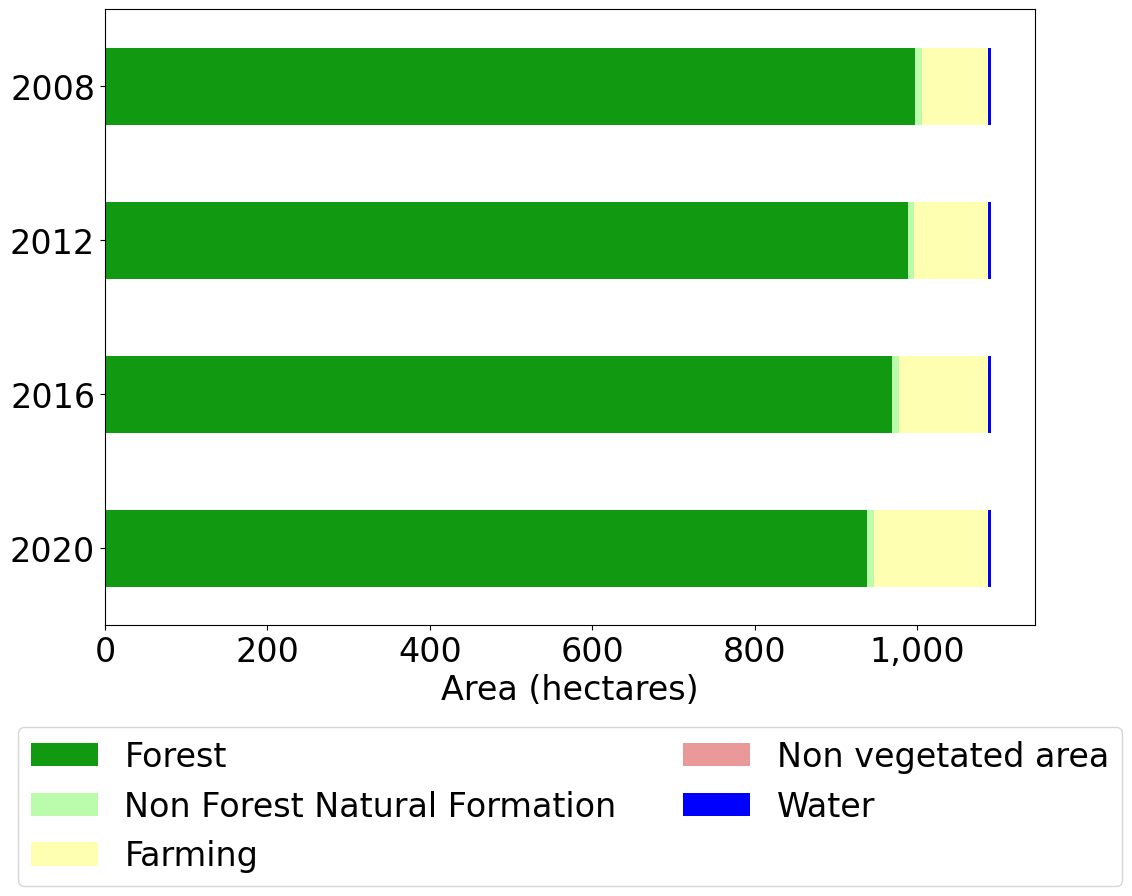

In [ ]:
recode_sum = recode_im_year_sum.drop(['vegnat'], axis=1)
fig=recode_mean.plot(x = 'ano',    kind = 'barh',    stacked = True,
                    #  title = 'Área total das classes de cobertura da terra nos Imóveis',
                     mark_right = True,    figsize=(12, 8),    color = code_colors_2, legend = False )
fig.ticklabel_format(style='plain', useOffset=False, axis='x')
fig.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}')) #split thousands with "."
# fig.set_xlabel('Área (km\u00b2)')
fig.set_xlabel('Area (hectares)')
fig.set_ylabel('')
fig.legend(labels=superclasses, loc='lower center', bbox_to_anchor=(0.5, -0.45),ncol=2)
plt.rcParams.update({'font.size': 24})
fig.figure.savefig('/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/ANALISES/FIGURAS/Recode_IM_absoluto_soma.png', dpi =500,bbox_inches = 'tight')

In [ ]:
recode_im_reset = recode_im_year_sum.set_index('ano').drop(['vegnat'], axis=1) #reseta para somar as demais colunas
recode_im_prop = recode_im_reset.div(recode_im_reset.sum(1), axis=0)*100
recode_im_prop.reset_index(inplace=True)#devolve a coluna de ano para fazer o gráfico
recode_im_prop

,ano,1,2,3,4,5
0,2020,86.042125,0.767574,12.889712,0.004473,0.296117
1,2016,88.898733,0.763009,10.046018,0.004384,0.287856
2,2012,90.629503,0.747775,8.330581,0.004349,0.287792
3,2008,91.468244,0.743089,7.496731,0.003913,0.288022


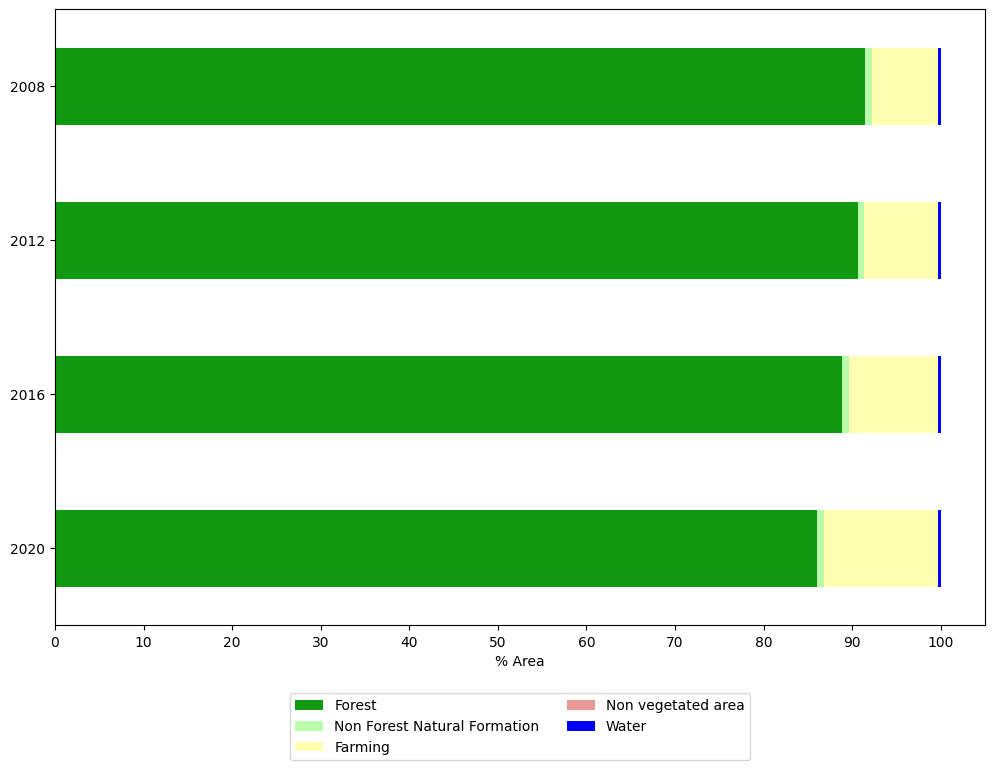

In [ ]:
fig=recode_im_prop.plot(x = 'ano',    kind = 'barh',    stacked = True,
                        # title = 'Percentual das classes de cobertura da terra nos Imóveis',
                        mark_right = True,    figsize=(12, 8),    color = code_colors_2, legend = False )
fig.ticklabel_format(style='plain', useOffset=False, axis='x')
fig.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}')) #split thousands with "."
# fig.set_xlabel('Área (km\u00b2)')
fig.set_xlabel('% Area')
fig.set_ylabel('')
fig.legend(labels=superclasses, loc='lower center', bbox_to_anchor=(0.5, -0.23),ncol=2)
fig.set(xticks=range(0, 110, 10))

fig.figure.savefig('/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/ANALISES/FIGURAS/Recode_IM_percentual_soma.png', dpi =500,bbox_inches = 'tight')

In [ ]:
perc_vegnat_year = recode_im_order_filtered.groupby('ano')['perc_vegnat'].mean().reset_index().sort_values(by=['ano'], axis=0, ascending=False, inplace=False)
perc_vegnat_year

,ano,perc_vegnat
3,2020,0.476949
2,2016,0.580690
1,2012,0.685688
0,2008,0.739026


In [ ]:
df_vegnat = perc_vegnat_year.sort_values(by=['ano'], axis=0, ascending=True, inplace=False).set_index('ano').T
df_vegnat

ano,2008,2012,2016,2020
perc_vegnat,0.739026,0.685688,0.58069,0.476949


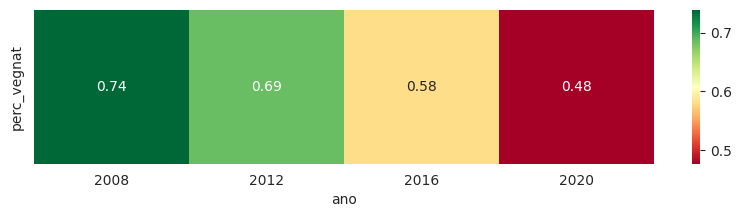

In [ ]:
fig.set_ylabel('')
with sns.axes_style('white'):
  f, ax = plt.subplots(figsize=(10,2))
  ax = sns.heatmap(df_vegnat, annot = True, cmap='RdYlGn')
  f.savefig('/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/ANALISES/FIGURAS/Recode_IM_percentual_soma_heatmap_vegnat.png', dpi =500)


In [ ]:
perc_forest_year = recode_im_order_filtered.groupby('ano')['perc_1'].mean().reset_index().sort_values(by=['ano'], axis=0, ascending=False, inplace=False)
df_forest = perc_forest_year.sort_values(by=['ano'], axis=0, ascending=True, inplace=False).set_index('ano').T
df_forest

ano,2008,2012,2016,2020
perc_1,0.73439,0.680534,0.57518,0.471888


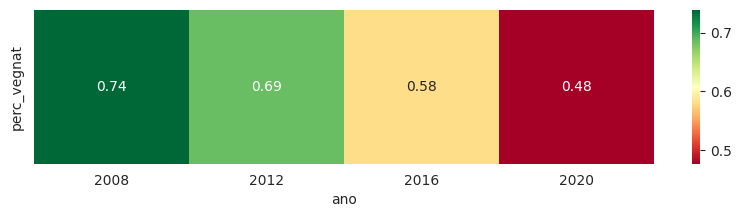

In [ ]:
fig.set_ylabel('')
with sns.axes_style('white'):
  f, ax = plt.subplots(figsize=(10,2))
  ax = sns.heatmap(df_vegnat, annot = True, cmap='RdYlGn')
  f.savefig('/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/ANALISES/FIGURAS/Recode_IM_percentual_soma_heatmap_forest.png', dpi =500)